# **1. Perkenalan Dataset** - NASA Turbofan Engine Degradation Simulation (C-MAPSS)


Dataset ini merupakan data C-MAPSS. C-MAPSS (Commercial Modular Aero-Propulsion System Simulation) adalah simulator yang dikembangkan oleh NASA untuk membuat data sensor dari mesin turbofan (seperti mesin jet di pesawat) yang beroperasi sampai mengalami kerusakan (run-to-failure). Dataset ini dirancang untuk Mensimulasikan bagaimana mesin mengalami degradasi seiring waktu dan bagaimana kerusakan bisa diprediksi dari data sensor.

- Setiap baris data = 1 siklus operasional mesin (satu kali terbang).
- Setiap kolom = informasi tentang kondisi mesin saat siklus tersebut.

**Nama dan Keterangan Kolom-Kolom**
- kolom 1 **unit_number**: Nomor Mesin / Identitas Mesin
- kolom 2 **time_in_cycles**: Urutan waktu/siklus terbang (1, 2, 3, … hingga rusak)
- kolom 3-5 **operational_setting_1-3**: Kondisi operasional (misalnya tekanan, suhu lingkungan, dll. Namun tidak dijelaskan secara detail oleh NASA)
- kolom 6-26 **sensor_1** s/d **sensor_21**: Data dari berbagai sensor internal mesin (getaran, suhu, tekanan, dll)


# **2. Import Library**

import semua package dan library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **3. Memuat Dataset**

Membaca seluruh dataset, memberikan nama pada seluruh variabel/fitur dan menghapus kolom kosong di akhir baris

In [4]:
def load_raw_data(file_path):
    """
    Load data mentah dari NASA Turbofan FD001
    """
    column_names = ['unit', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
                   [f'sensor_{i}' for i in range(1, 22)]
    
    df = pd.read_csv(file_path, sep=' ', header=None)
    df.dropna(axis=1, how='all', inplace=True)
    df.columns = column_names
    return df

raw_path = "nasa_preprocessing/raw/train_FD001.txt"  # sesuaikan path jika beda
column_names = ['unit', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_{i}' for i in range(1, 22)]
df = load_raw_data(raw_path)
df.dropna(axis=1, how='all', inplace=True)
df.columns = column_names

In [5]:
print("Jumlah unit engine:", df['unit'].nunique())
df.head()

Jumlah unit engine: 100


,unit,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
# 1. Load data
df_csv = pd.read_csv("nasa_preprocessing/clean/train_FD001_clean.csv")

print("Kolom dalam dataframe:", df.columns.tolist())

Kolom dalam dataframe: ['unit', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

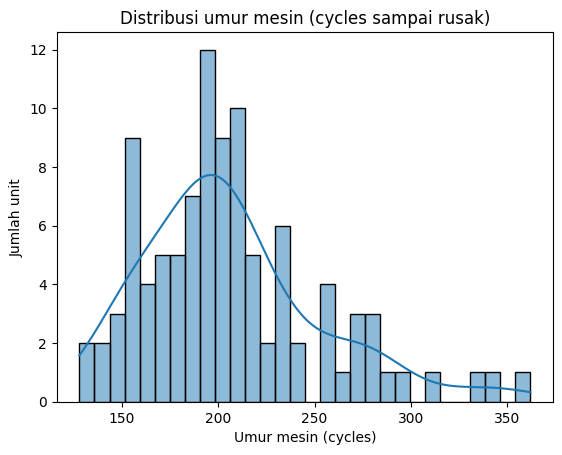

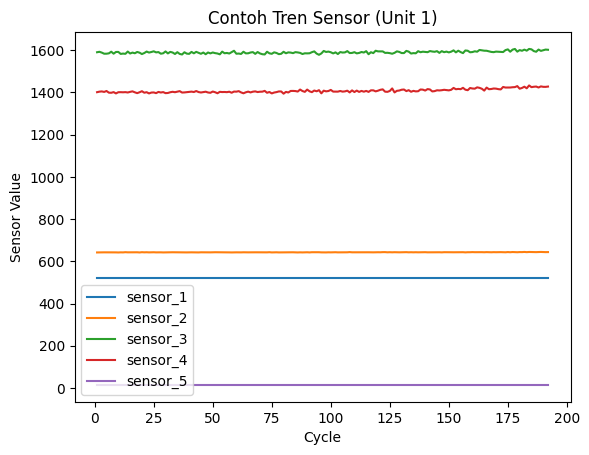

In [7]:
# Distribusi umur maksimum mesin
max_cycle = df.groupby('unit')['time_in_cycles'].max()
sns.histplot(max_cycle, bins=30, kde=True)
plt.title("Distribusi umur mesin (cycles sampai rusak)")
plt.xlabel("Umur mesin (cycles)")
plt.ylabel("Jumlah unit")
plt.show()

# Contoh tren sensor
sensor_cols = [f'sensor_{i}' for i in range(1, 6)]
df_sample = df[df['unit'] == 1]

for sensor in sensor_cols:
    plt.plot(df_sample['time_in_cycles'], df_sample[sensor], label=sensor)

plt.title("Contoh Tren Sensor (Unit 1)")
plt.xlabel("Cycle")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()


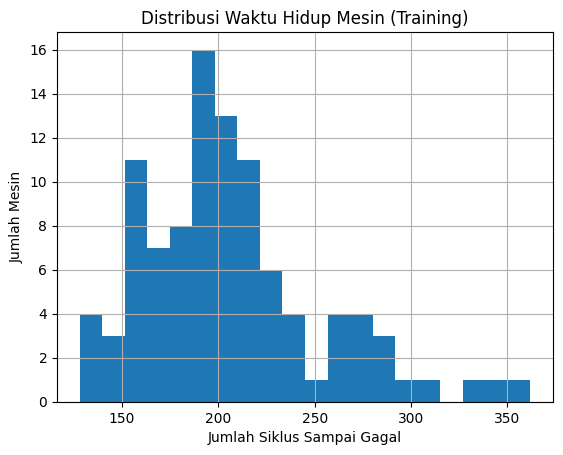

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_in_cycles, dtype: float64

In [11]:
lifespan = df_csv.groupby('unit')['time_in_cycles'].max()
lifespan.hist(bins=20)
plt.title("Distribusi Waktu Hidup Mesin (Training)")
plt.xlabel("Jumlah Siklus Sampai Gagal")
plt.ylabel("Jumlah Mesin")
plt.show()

lifespan.describe()

Berdasarkan distribusi waktu hidup mesin yang ditampilkan, ada beberapa kesimpulan:
-  **Analisis Distribusi:**
    - Rata-rata Waktu Hidup Mesin (mean): Rata-rata waktu hidup mesin adalah sekitar 206 siklus, dengan rentang nilai antara 128 hingga 362 siklus.
    - Variasi Waktu Hidup Mesin (std): Ada variasi yang cukup besar (sekitar 46 siklus) antara mesin yang memiliki waktu hidup pendek dan panjang.
    - Median (50%): Nilai median dari waktu hidup mesin adalah 199 siklus, yang sedikit lebih rendah dari rata-rata, menunjukkan bahwa sebagian besar mesin memiliki waktu hidup yang relatif lebih pendek daripada rata-rata.
    - Distribusi: Dalam histogram, Anda dapat melihat bahwa sebagian besar mesin cenderung gagal dalam rentang 170-230 siklus, dengan beberapa mesin yang memiliki waktu hidup yang jauh lebih panjang, mendekati nilai maksimum 362 siklus.

# **5. Data Preprocessing**

- **Remaining Useful Life (RUL)**, adalah konsep yang digunakan dalam konteks prediktif maintenance (pemeliharaan prediktif). RUL merujuk pada perkiraan waktu atau jumlah siklus operasional yang tersisa sebelum sebuah mesin atau komponen gagal atau mengalami kerusakan yang signifikan. dengan kata lain, **Remaining Useful Life (RUL)** merupakan estimasi tentang berapa lama lagi (Siklus) suatu komponen atau sistem dapat berfungsi dengan baik sebelum diperlukan perbaikan atau penggantian.

- Menghapus sensor yang flat (tanpa variasi). Membuang fitur (sensor) yang tidak mengandung informasi karena nilainya selalu konstan (standar deviasi = 0).
Sensor seperti ini tidak berguna untuk model karena tidak membantu membedakan antara data yang sehat atau mendekati kerusakan.

- Normalisasi fitur numerik, Melakukan normalisasi fitur (scaling ke rentang 0–1) menggunakan MinMaxScaler agar Semua fitur berada dalam skala yang sama.

In [18]:
# Tambahkan kolom RUL (Remaining Useful Life)
rul = df.groupby('unit')['time_in_cycles'].max().reset_index()
rul.columns = ['unit', 'max_cycle']
df = df.merge(rul, on='unit', how='left')
df['RUL'] = df['max_cycle'] - df['time_in_cycles']
df.drop('max_cycle', axis=1, inplace=True)

# Hilangkan sensor yang flat (tidak ada variasi) atau redundan
sensor_to_drop = []
for col in df.columns:
    if 'sensor_' in col:
        if df[col].std() == 0:
            sensor_to_drop.append(col)

df.drop(columns=sensor_to_drop, inplace=True)

print("Sensor yang dihapus karena flat:", sensor_to_drop)

# Normalisasi fitur numerik (opsional, tergantung model nanti)
from sklearn.preprocessing import MinMaxScaler

feature_cols = [col for col in df.columns if col not in ['unit', 'time_in_cycles', 'RUL']]
scaler = MinMaxScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

df.head()


Sensor yang dihapus karena flat: ['sensor_1', 'sensor_10', 'sensor_18', 'sensor_19']


,unit,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_20,sensor_21,RUL
0,1,1,0.459770,0.166667,0.0,0.183735,0.406802,0.309757,0.0,1.0,...,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.0,0.283133,0.453019,0.352633,0.0,1.0,...,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.0,0.343373,0.369523,0.370527,0.0,1.0,...,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.0,0.343373,0.256159,0.331195,0.0,1.0,...,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.0,0.349398,0.257467,0.404625,0.0,1.0,...,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.589147,0.704502,187
